## Importing libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv(r"C:\Users\Priya\Downloads\gld_price_data.csv")

In [49]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [50]:
# SPX - capitalization index from 500 companies
# GLD - Gold Price(We need to predict)
# USO - United State oil price
# SLV - Silver trust tracks the price of silver in USD
# EUR/USD - European currency pair. tells how many US dollars are needed to purchase one Euro.

In [51]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [52]:
# data is from 2008 to 2018

In [53]:
df.shape

(2290, 6)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [55]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [56]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [57]:
#correlation from the dataset

In [58]:
corr = df.corr()

C:\Users\Priya\AppData\Local\Temp\ipykernel_16976\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

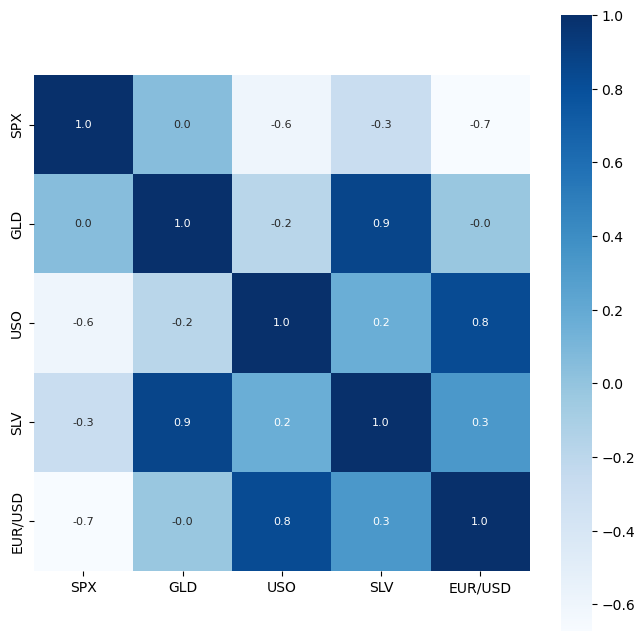

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [61]:
print(corr['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Priya\AppData\Local\Temp\ipykernel_16976\2868900106.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

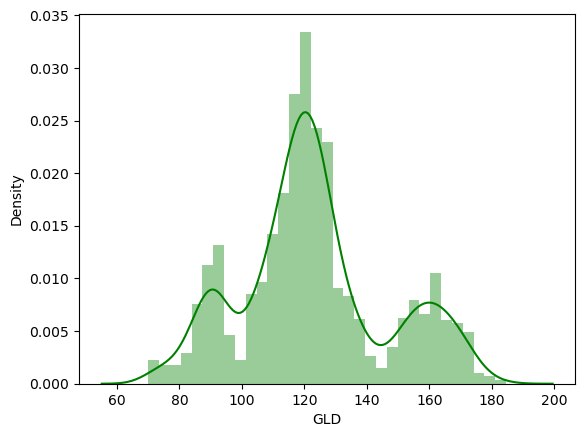

In [62]:
sns.distplot(df['GLD'], color='green')

In [63]:
# We don't need date column for the prediction

### Splitting the features and target

In [64]:
X = df.drop(['Date','GLD'], axis=1)
Y = df['GLD']

In [65]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [66]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [67]:
## Splitting into training data and test data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Model Building

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
reg = RandomForestRegressor(n_estimators=100)

In [72]:
reg.fit(X_train,Y_train)

RandomForestRegressor()

In [73]:
pred = reg.predict(X_test)

In [74]:
pred

array([168.50679876,  82.17119959, 116.15949986, 127.60020059,
       120.6786012 , 154.76169776, 150.28329936, 126.12130012,
       117.46799884, 125.95600064, 116.78030095, 172.45130082,
       141.62869881, 167.87769778, 115.04609997, 117.62860074,
       137.56680361, 170.22900094, 159.95680348, 159.32559973,
       155.07010003, 125.02500034, 176.04289942, 157.13450289,
       125.27110065,  94.01140002,  77.63619988, 120.58610004,
       119.03829917, 167.47309982,  88.06980106, 125.17029964,
        91.10770103, 117.89169976, 121.1470993 , 136.38790118,
       115.47820137, 114.96150061, 147.65709901, 107.12230099,
       104.05520236,  87.17949783, 126.58160092, 118.00039999,
       153.20169961, 119.53310009, 108.29960004, 107.9204977 ,
        93.23710067, 127.13579746,  74.44430094, 113.55629902,
       121.33050012, 111.28329938, 118.79959905, 120.7183993 ,
       158.83970054, 167.33680191, 146.98119702,  85.80319844,
        94.47560029,  86.77949872,  90.40990036, 119.00

In [77]:
from sklearn import metrics

In [78]:
error_score = metrics.r2_score(Y_test, pred)

In [79]:
print("R squared= ", error_score)

R squared=  0.9895625596792719


In [80]:
# Comparing actual and predicted value

In [81]:
Y_test = list(Y_test)

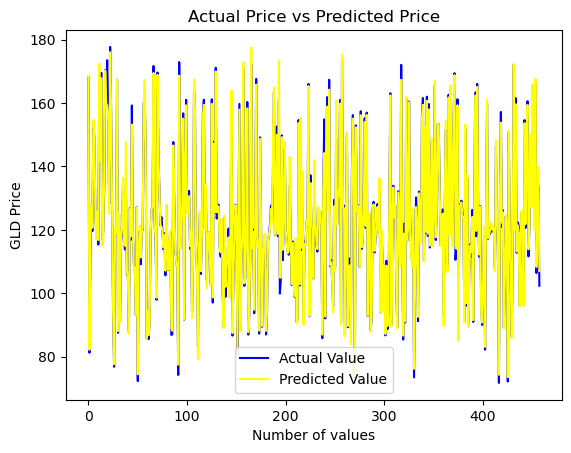

In [84]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(pred, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [ ]:
#Values are very close to each other